In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("promotion.csv",
                 names=['TV', 'Radio', 'Social', 'Influencer', 'Sales'])

In [4]:
df

,TV,Radio,Social,Influencer,Sales
0,16,6.566231,2.907983,1,54.732757
1,13,9.237765,2.409567,1,46.677897
2,41,15.886446,2.913410,2,150.177829
3,83,30.020028,6.922304,3,298.246340
4,15,8.437408,1.405998,1,56.594181
...,...,...,...,...,...
95,95,38.415225,7.673637,3,336.760633
96,20,3.934783,0.328470,1,72.625903
97,49,24.359044,3.797367,2,174.198139
98,29,11.213689,0.558837,2,98.999638


In [6]:
df.describe()

,TV,Radio,Social,Influencer,Sales
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,53.110000,18.763521,3.585933,1.970000,189.091375
std,28.428857,11.573472,2.159928,0.809726,101.646560
min,10.000000,0.226326,0.041494,1.000000,32.566825
25%,29.000000,9.202518,2.168767,1.000000,103.194425
50%,48.000000,18.010163,3.219552,2.000000,168.522326
75%,78.250000,26.950706,4.627252,3.000000,277.695740
max,100.000000,47.116293,9.322958,3.000000,353.804639


In [7]:
X = df[['TV', 'Radio', 'Social']]
y = df['Sales']


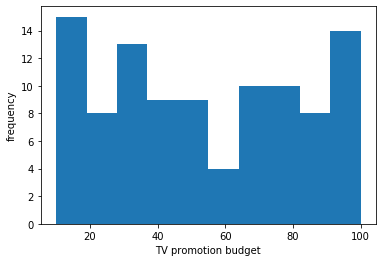

In [8]:
plt.hist(X['TV'],bins=10)
plt.xlabel("TV promotion budget")
plt.ylabel("frequency")
plt.show() 

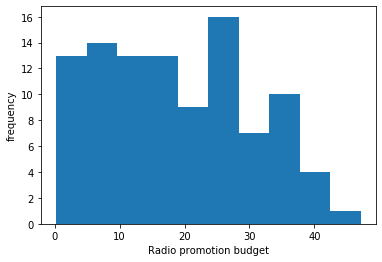

In [9]:
plt.hist(X['Radio'],bins=10)
plt.xlabel("Radio promotion budget")
plt.ylabel("frequency")
plt.show() 

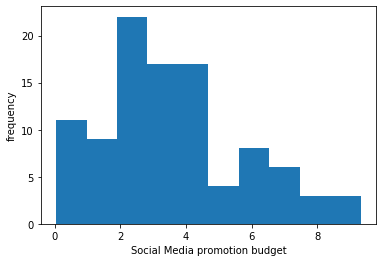

In [10]:
plt.hist(X['Social'],bins=10)
plt.xlabel("Social Media promotion budget")
plt.ylabel("frequency")
plt.show() 


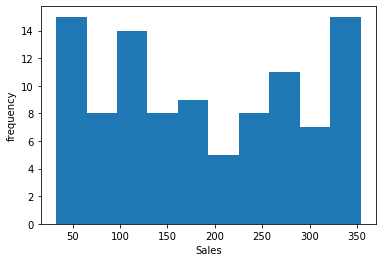

In [11]:
plt.hist(y,bins=10)
plt.xlabel("Sales")
plt.ylabel("frequency")
plt.show()


In [13]:
df.corr()

,TV,Radio,Social,Influencer,Sales
TV,1.000000,0.900525,0.681190,0.722849,0.999103
Radio,0.900525,1.000000,0.710000,0.650943,0.900577
Social,0.681190,0.710000,1.000000,0.483282,0.682102
Influencer,0.722849,0.650943,0.483282,1.000000,0.723734
Sales,0.999103,0.900577,0.682102,0.723734,1.000000


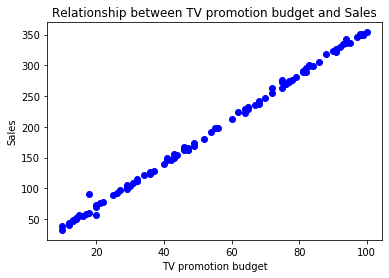

In [14]:
plt.scatter(X['TV'], y, color = 'blue')
plt.title('Relationship between TV promotion budget and Sales')
plt.xlabel('TV promotion budget')
plt.ylabel('Sales')
plt.show()

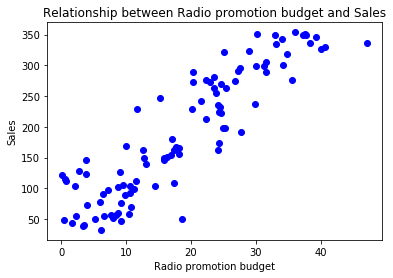

In [15]:
plt.scatter(X['Radio'], y, color = 'blue')
plt.title('Relationship between Radio promotion budget and Sales')
plt.xlabel('Radio promotion budget')
plt.ylabel('Sales')
plt.show()

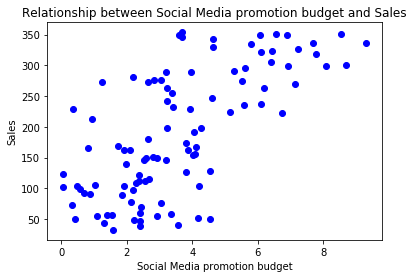

In [17]:
plt.scatter(X['Social'], y, color = 'blue')
plt.title('Relationship between Social Media promotion budget and Sales')
plt.xlabel('Social Media promotion budget')
plt.ylabel('Sales')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[['TV']], y, test_size=0.3, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm.coef_

array([3.56753706])

In [22]:
lm.intercept_

-0.6055318201099169

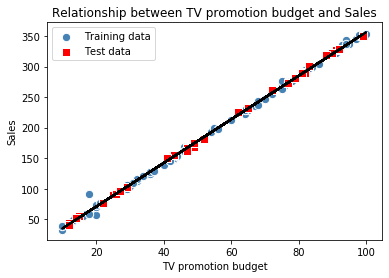

In [23]:
plt.scatter(X_train, y_train, c='steelblue', marker='o', edgecolor='white',
            s=70, label='Training data')
plt.scatter(X_test, y_test, c='red', marker='s', edgecolor='white', s=70,
            label='Test data')
plt.plot(X_train.values, lm.predict(X_train), color='black', lw=2)
plt.legend(loc='upper left')
plt.title('Relationship between TV promotion budget and Sales')
plt.xlabel('TV promotion budget')
plt.ylabel('Sales')
plt.show()


In [28]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [25]:
print(lm.predict([[50]]))

[177.77132135]


In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

9.07753149147511

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.999081805392673

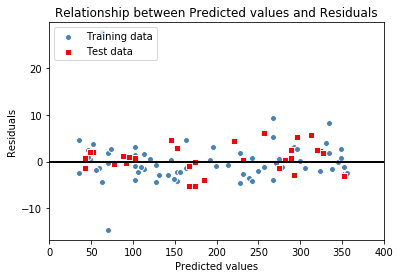

In [35]:
plt.scatter(y_train_pred,  y_train - y_train_pred,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test - y_test_pred,
            c='red', marker='s', edgecolor='white',
            label='Test data')
plt.title('Relationship between Predicted values and Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=400, color='black', lw=2)
plt.xlim([0, 400])
plt.show()
